In [79]:
# major project 1
#android malware
#1.create a dataset
import pandas as pd
df = pd.read_csv("/content/major project 1 dataset.csv")
df

,transact,API call signature
0,onServiceConnected,API call signature
1,bindService,API call signature
2,attachInterface,API call signature
3,ServiceConnection,API call signature
4,android.os.Binder,API call signature
...,...,...
210,ACCESS_FINE_LOCATION,Manifest Permission
211,SET_WALLPAPER_HINTS,Manifest Permission
212,SET_PREFERRED_APPLICATIONS,Manifest Permission
213,WRITE_SECURE_SETTINGS,Manifest Permission


In [ ]:
df.info

<bound method DataFrame.info of                        transact   API call signature
0            onServiceConnected   API call signature
1                   bindService   API call signature
2               attachInterface   API call signature
3             ServiceConnection   API call signature
4             android.os.Binder   API call signature
..                          ...                  ...
210        ACCESS_FINE_LOCATION  Manifest Permission
211         SET_WALLPAPER_HINTS  Manifest Permission
212  SET_PREFERRED_APPLICATIONS  Manifest Permission
213       WRITE_SECURE_SETTINGS  Manifest Permission
214                       class  B=Benign; S=Malware

[215 rows x 2 columns]>

In [ ]:
df['API call signature'].value_counts()

Manifest Permission    113
API call signature      72
Intent                  23
Commands signature       6
B=Benign; S=Malware      1
Name: API call signature, dtype: int64

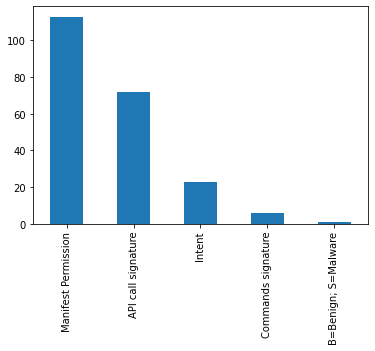

In [ ]:
#data visuvalization
df['API call signature'].value_counts().plot(kind='bar')

In [ ]:
#divide input and output
#input
x=df.iloc[:,0].values
print(input)
print(x)


In [ ]:
#output
y=df.iloc[:,1].values
y

In [ ]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
#apply tfidf vectorizer
vet=TfidfVectorizer()
x_train_y=vet.fit_transform(x_train)
x_test=vet.transform(x_test)

In [ ]:
#apply svc
from sklearn.svm import SVC
model=SVC()
model.fit(x_train_y,y_train)

SVC()

In [ ]:
#predict the variable
y_pred=model.predict(x_train_y)
y_pred

In [ ]:
y_test

In [ ]:
#individual predictiton
a=df['transact'][100]
a

'HttpPost.init'

In [ ]:
a=vet.transform([a])
model.predict(a)

array(['API call signature'], dtype=object)

In [ ]:
#pipeling
from sklearn.pipeline import make_pipeline
text_model=make_pipeline(TfidfVectorizer(),SVC())
text_model.fit(x_train,y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()), ('svc', SVC())])

In [ ]:
import joblib
joblib.dump(text_model,'android malware')
#we are dumping spam hum file into pipeline

['android malware']

In [ ]:
!pip install streamlit --quiet # Installing the streamlit library

In [ ]:
%%writefile app.py
# it is a magic command which creates a file named app.py
import streamlit as st
import joblib
model = joblib.load('android malware')
st.title('android malware')
ip = st.text_input('enter the message')
op = model.predict([ip])
if st.button('predict'):
  st.title(op[0])

Writing app.py


In [ ]:
#temporary deployment
!streamlit run app.py & npx localtunnel --port 8501